# İçindekiler
* 1- Gerekli Kurulumların Yapılması
* 2- Veri Tanıma
* 3- Veri Görselleştirme
* 4- Veri Ön İşlem
* 5- Modellerin Uygulanması
* 6- Modellerin Karşılaştırılması
* 7- En iyi Model/Modellerin İyileştirilmesi

-----------------

# 1.Gerekli Kurulumların Yapılması

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from warnings import filterwarnings
filterwarnings("ignore")

In [102]:
#!pip install xgboost

# 2.Verinin Yüklenmesi ve Veriyi Tanıma

In [13]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


# 3.Veri Görselleştirme

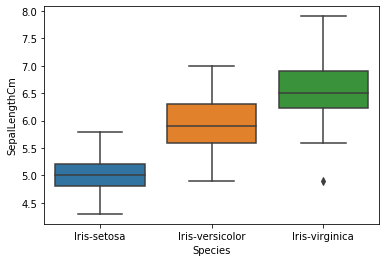

In [21]:
sns.boxplot(x='Species', y='SepalLengthCm', data=df)

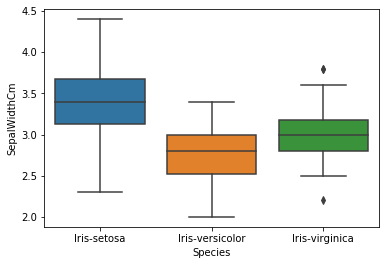

In [22]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df)

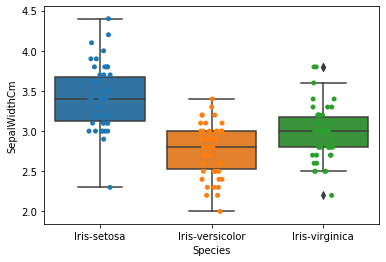

In [23]:
ax = sns.boxplot(data=df, x = 'Species',y = 'SepalWidthCm')
ax = sns.stripplot(data=df, x='Species', y='SepalWidthCm', jitter=True, edgecolor='green')

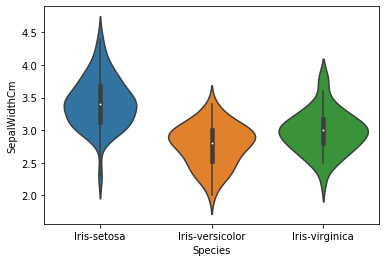

In [24]:
sns.violinplot(x='Species',y='SepalWidthCm', data=df, size=6)

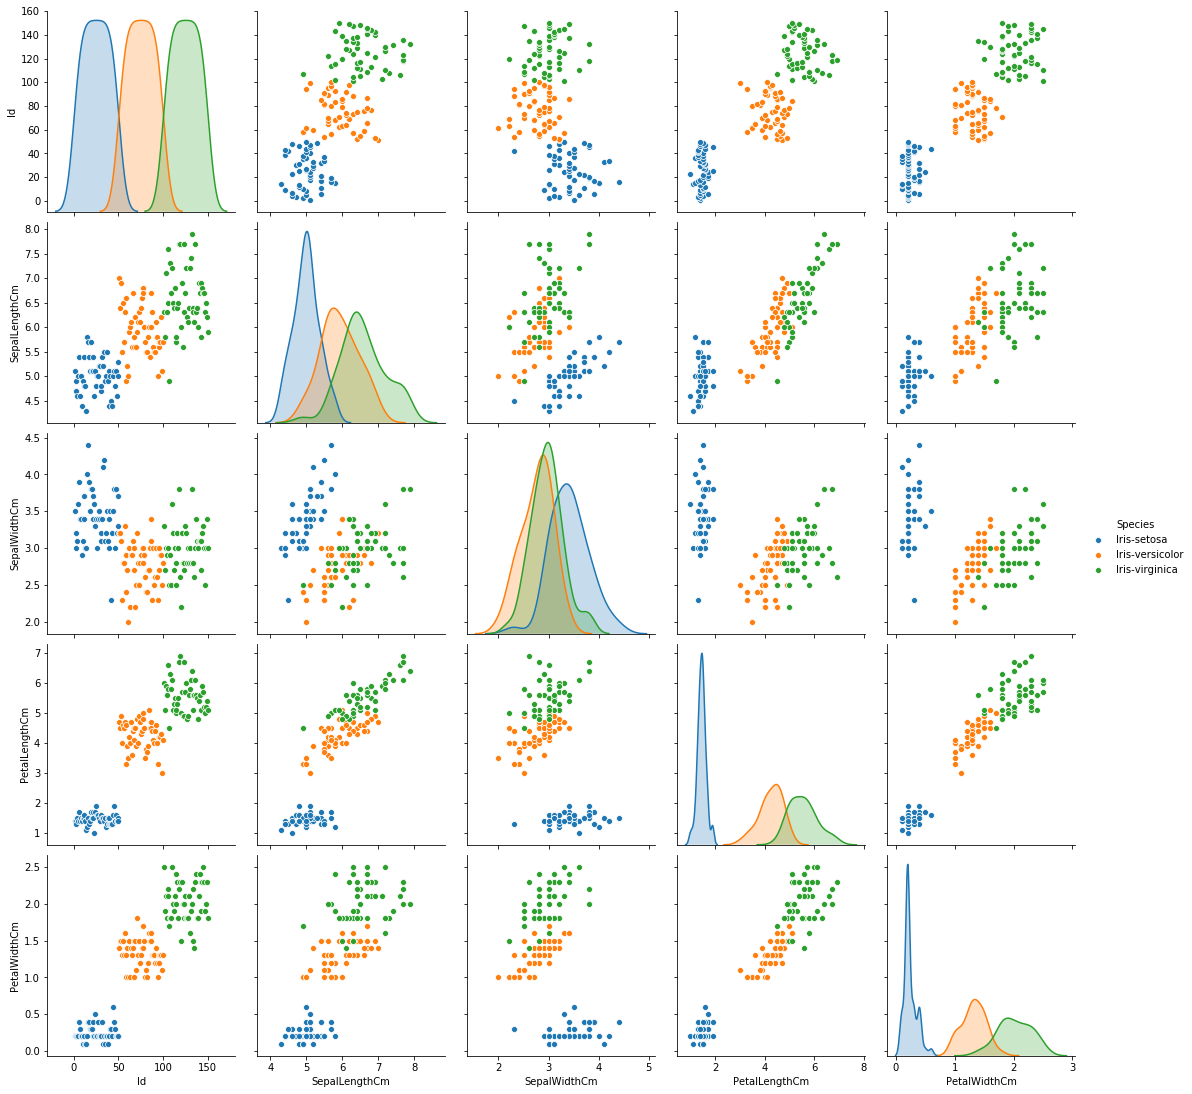

In [26]:
sns.pairplot(data=df,hue='Species', size=3)

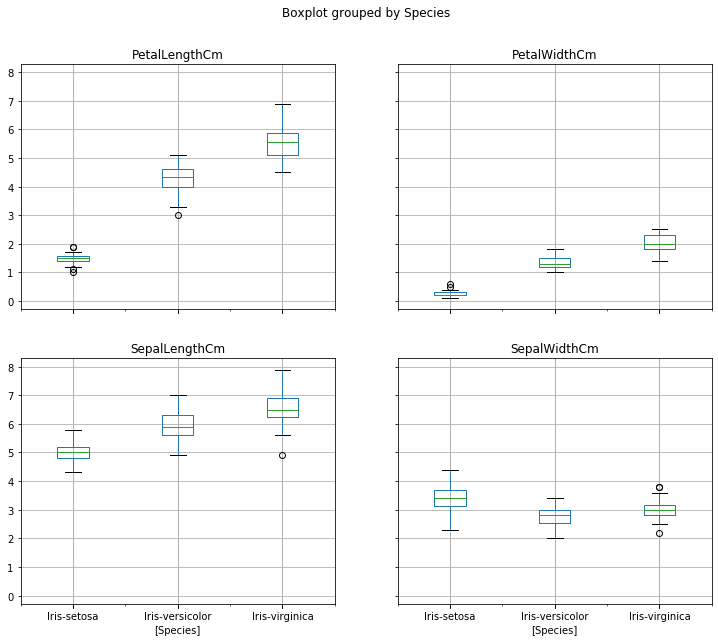

In [28]:
df.drop("Id", axis = 1).boxplot(by = "Species", figsize = (12,10));

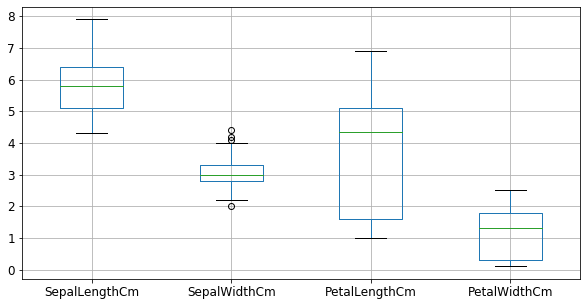

In [29]:
df.drop("Id", axis = 1).boxplot(fontsize = 12, figsize = (10,5));

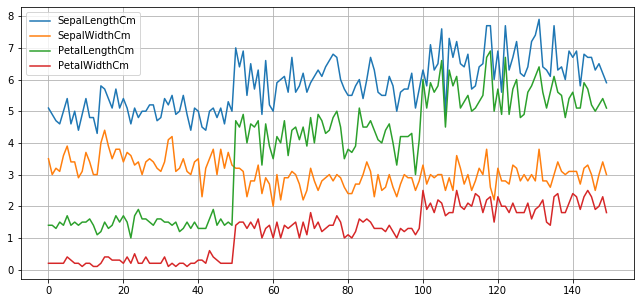

In [30]:
df.drop("Id", axis = 1).plot(grid = True, figsize = (11,5));

# 4.Veri Ön işleme

In [31]:
df.drop("Id", axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
label_encoder = preprocessing.LabelEncoder()
df["Species_Encoded"] = label_encoder.fit_transform(df["Species"]) 
df["Species_Encoded"].unique()

array([0, 1, 2])

In [34]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_Encoded
38,4.4,3.0,1.3,0.2,Iris-setosa,0
105,7.6,3.0,6.6,2.1,Iris-virginica,2
29,4.7,3.2,1.6,0.2,Iris-setosa,0
67,5.8,2.7,4.1,1.0,Iris-versicolor,1
136,6.3,3.4,5.6,2.4,Iris-virginica,2


# 5. Veriyi Modele Hazırlama ve Algoritmaları Uygulama

In [56]:
X = df.drop(["Species", "Species_Encoded"], axis = 1)
y = df["Species_Encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## 1-Logistic Regression
* Test-Train Kod Satırı Farklı çalıştırmalarda 0.93-1 arasında veriyor

In [58]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [59]:
r2_score(y_test, y_pred)

0.8964723926380368

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2581988897471611

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [62]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,2,2,Iris-virginica,True
1,1,1,Iris-versicolor,True
2,0,0,Iris-setosa,True
3,0,0,Iris-setosa,True
4,0,0,Iris-setosa,True


In [63]:
submission["Species_"].value_counts().to_frame()

,Species_
True,42
False,3


In [64]:
submission[submission["Species_"] == False]

,Species_Encoded,Class,Species,Species_
12,1,2,Iris-virginica,False
14,1,2,Iris-virginica,False
38,2,1,Iris-versicolor,False


In [65]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 1.  , 1.  , 0.8 , 0.8 , 1.  , 0.75, 1.  , 1.  , 1.  ])

In [66]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.9349999999999999

# 2- K-NN

In [69]:
model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [70]:
r2_score(y_test, y_pred)

0.8964723926380368

In [71]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2581988897471611

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [76]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.sample(3)

,Species_Encoded,Class,Species,Species_
24,0,0,Iris-setosa,True
17,1,1,Iris-versicolor,True
1,1,1,Iris-versicolor,True


In [77]:
submission["Species_"].value_counts().to_frame()

,Species_
True,42
False,3


In [78]:
submission[submission["Species_"] == False]

,Species_Encoded,Class,Species,Species_
12,1,2,Iris-virginica,False
14,1,2,Iris-virginica,False
38,2,1,Iris-versicolor,False


In [79]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 1.  , 0.8 , 0.8 , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  ])

In [80]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.9349999999999999

# 3- Destek Vektör Sınıflandırma (SVC)
* SVC yani Support Vector Classification, Support Vector Machine'nin Classification(Sınıflandırma) Türüdür

In [81]:
model = SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [82]:
r2_score(y_test, y_pred)

0.8964723926380368

In [83]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2581988897471611

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [85]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,2,2,Iris-virginica,True
1,1,1,Iris-versicolor,True
2,0,0,Iris-setosa,True
3,0,0,Iris-setosa,True
4,0,0,Iris-setosa,True


In [86]:
submission["Species_"].value_counts().to_frame()

,Species_
True,42
False,3


In [87]:
submission[submission["Species_"] == False]

,Species_Encoded,Class,Species,Species_
12,1,2,Iris-virginica,False
14,1,2,Iris-virginica,False
38,2,1,Iris-versicolor,False


In [88]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 0.6 , 0.6 , 1.  , 0.8 , 1.  , 0.75, 1.  , 1.  , 1.  ])

In [89]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.875

# 4- Rastgele Orman (Random Forest)

In [90]:
model = RandomForestClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [91]:
r2_score(y_test, y_pred)

0.8964723926380368

In [92]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2581988897471611

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [94]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,2,2,Iris-virginica,True
1,1,1,Iris-versicolor,True
2,0,0,Iris-setosa,True
3,0,0,Iris-setosa,True
4,0,0,Iris-setosa,True


In [95]:
submission["Species_"].value_counts().to_frame()

,Species_
True,42
False,3


In [96]:
cross_val_score(model, X_test, y_test, cv = 10)

array([1.  , 0.8 , 1.  , 0.8 , 1.  , 1.  , 0.75, 1.  , 1.  , 1.  ])

In [97]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

0.9349999999999999

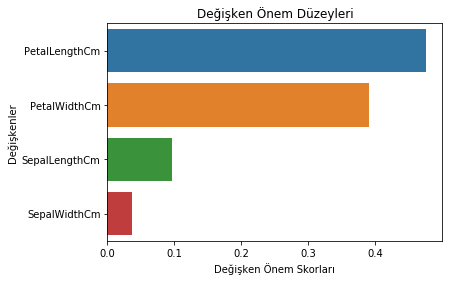

In [98]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

# 5- XGBoost

In [104]:
model = XGBClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

[10:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9333333333333333

In [105]:
r2_score(y_test, y_pred)

0.8964723926380368

In [106]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2581988897471611

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [108]:
submission = y_test.to_frame()
submission = submission.reset_index()
submission = submission.drop("index", axis = 1)

submission["Class"] = y_pred
submission["Species"] = submission["Class"].map({0 : "Iris-setosa", 1 : "Iris-versicolor", 2 : "Iris-virginica"})
submission["Species_"] = submission["Species_Encoded"] == submission["Class"]

submission.head()

,Species_Encoded,Class,Species,Species_
0,2,2,Iris-virginica,True
1,1,1,Iris-versicolor,True
2,0,0,Iris-setosa,True
3,0,0,Iris-setosa,True
4,0,0,Iris-setosa,True


In [109]:
submission["Species_"].value_counts().to_frame()

,Species_
True,42
False,3


In [110]:
cross_val_score(model, X_test, y_test, cv = 10)

[10:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([1.  , 0.8 , 1.  , 0.8 , 0.8 , 1.  , 0.75, 1.  , 1.  , 1.  ])

In [111]:
cross_val_score(model, X_test, y_test, cv = 10).mean()

[10:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

0.915

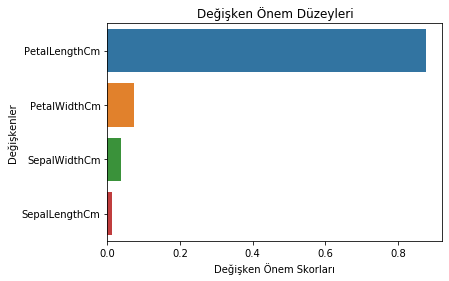

In [112]:
feature_imp = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri");

* Veri, anlaşılması kolay bir veri olduğu için fazla görselleştirme ile kafa bulandırmak istemedim. Ancak pratik yapmak için bu yol izlenebilir
* Daha fazla model uygulanabilir, ancak sonuçlar az çok aynı olacağı için bu da aynı şekilde pratik niyetiyle iyi olur
* Notebook daha güzel hale getirilebilir

* 1- Karşılaştırma Grafiği
* 2- Confusion Matrix, f1 score, auc vs
* xg boost düzelt